In [1]:
from sklearn.datasets import load_wine
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np

In [2]:
# csv_df = pd.read_csv('https://vae-bed.s3.us-east-2.amazonaws.com/updated_renamed.csv')
csv_df = pd.read_csv('/Users/swarchol/Research/seal/data/updated_renamed.csv')

In [3]:
csv_df.columns

Index(['CellID', 'DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen', 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation',
       'Sample', 'Condition', 'Replicate', 'emb1', 'emb2', 'cluster_2d',
       'UMAP_X', 'UMAP_Y', 'kmeans'],
      dtype='object')

In [4]:
columns = csv_df.columns
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen',]

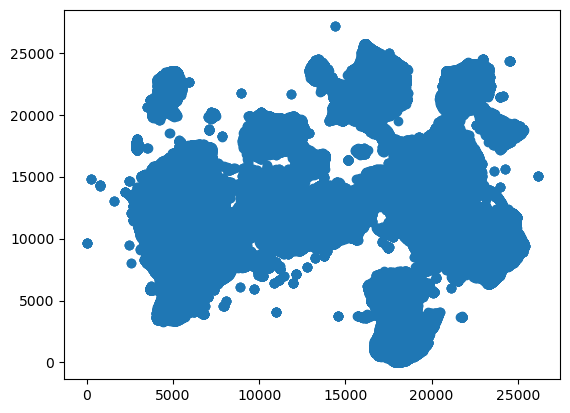

In [5]:
plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])

In [7]:
# regressor = xgb.XGBRegressor()
regressor = xgb.XGBRegressor(
                 n_estimators=2000,
                 max_depth=9,
                 seed=1000)
!wget https://vae-bed.s3.us-east-2.amazonaws.com/xgb_regressor.json -O xgb_regressor.json
regressor.load_model('xgb_regressor.json')



dyld[5404]: Library not loaded: /opt/homebrew/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <A2808CD2-467C-32EF-B7CF-9441D98ABF5E> /opt/homebrew/Cellar/wget/1.21.3/bin/wget
  Reason: tried: '/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/opt/homebrew/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/opt/homebrew/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)


In [8]:

# regressor.fit(csv_df[feature_columns], csv_df[['UMAP_X','UMAP_Y']])
# xgb_preds = regressor.predict(csv_df[feature_columns])
# Save Regressor
# with open('xgb_regressor.pkl', 'wb') as f:
#     pickle.dump(regressor, f)

In [ ]:
# with open('xgb_regressor.pkl', 'rb') as f:
#     regressor = pickle.load(f)


In [18]:
# regressor.save_model('xgb_regressor.json')
explainer = shap.Explainer(regressor)


In [ ]:

chunks = np.array_split(csv_df[feature_columns], 1000)

shap_values_list = []
# shap_values_array = None
shap_values_array = np.load('shap_values_array.npy')

In [21]:


for chunk in tqdm(chunks, desc="Calculating SHAP values"):
    if (chunk.index.stop) <= shap_values_array.shape[0]:
        print(f"Skipping chunk {chunk.index.stop -1} because it is already in shap_values_array")
    else:
        shap_values = explainer(chunk)
        # if shap_values_array is None:
        #     shap_values_array = shap_values.values
        # else:
        shap_values_array = np.concatenate((shap_values_array, shap_values.values), axis=0)
        np.save('shap_values_array.npy', shap_values_array)

Calculating SHAP values:   0%|          | 0/1000 [00:00<?, ?it/s]

Skipping chunk 933 because it is already in shap_values_array
Skipping chunk 1867 because it is already in shap_values_array
Skipping chunk 2801 because it is already in shap_values_array
Skipping chunk 3735 because it is already in shap_values_array
Skipping chunk 4669 because it is already in shap_values_array
Skipping chunk 5603 because it is already in shap_values_array
Skipping chunk 6537 because it is already in shap_values_array
Skipping chunk 7471 because it is already in shap_values_array
Skipping chunk 8405 because it is already in shap_values_array
Skipping chunk 9339 because it is already in shap_values_array
Skipping chunk 10273 because it is already in shap_values_array
Skipping chunk 11207 because it is already in shap_values_array
Skipping chunk 12141 because it is already in shap_values_array
Skipping chunk 13075 because it is already in shap_values_array
Skipping chunk 14009 because it is already in shap_values_array
Skipping chunk 14943 because it is already in shap_

In [16]:
(chunk.index.stop) <= shap_values_array.shape[0]
        # print(f"Skipping chunk {chunk.index.stop -1} because it is already in shap_values_array")
        # continue

True

In [48]:
shap_values_array = np.abs(shap_values_array)


In [53]:
summed_shap_values = shap_values_array.sum(axis=2)

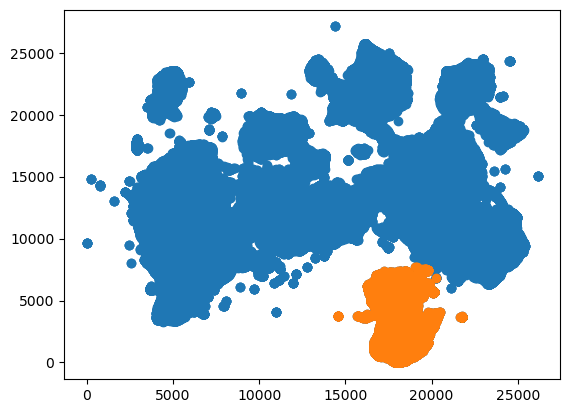

In [30]:
cluster = csv_df[csv_df.kmeans == 7]
plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])
plt.scatter(cluster['UMAP_X'], cluster['UMAP_Y'])


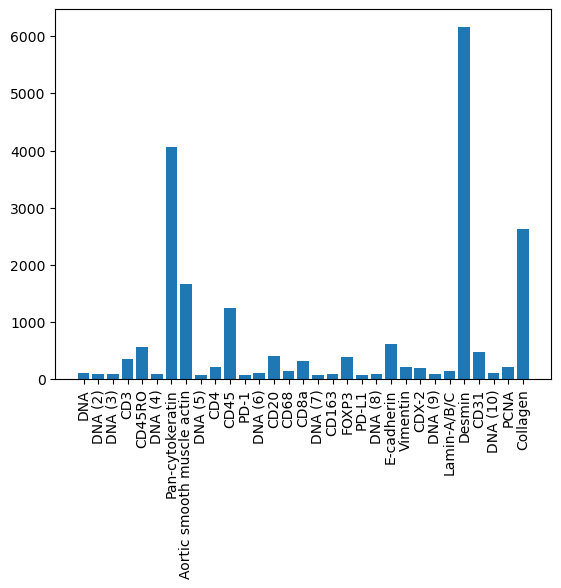

In [64]:
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']
cluster_7 = csv_df[csv_df['kmeans'] == 7].index.tolist()
cluster_7_vals = summed_shap_values[cluster_7]
mean_cluster_7_vals = cluster_7_vals.mean(axis=0)
# bar plot of mean_cluster_7_vals, which have labels as feature_columns
plt.bar(feature_columns, mean_cluster_7_vals)
plt.xticks(rotation=90)
plt.show()


In [42]:

len(feature_columns)

31

In [43]:
mean_summed_shap_values[cluster_7].shape

(78091,)

In [65]:
old_feat_imp = np.load(f"/Users/swarchol/Research/seal/data/greg.shap.npy")
old_feat_imp.shape

(933253, 21, 2)

In [68]:
shap_values_array.shape
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']

# Sort feature columns alphabetically
sorted_feature_columns = sorted(feature_columns)

# Get the mapping from old to new indices
old_to_new = {feature: i for i, feature in enumerate(feature_columns)}
new_to_old = {i: old_to_new[feature] for i, feature in enumerate(sorted_feature_columns)}

# Reorder shap_values_array using the mapping
reordered_shap_values = shap_values_array[:, [new_to_old[i] for i in range(len(feature_columns))], :]

# Update feature_columns to be sorted
feature_columns = sorted_feature_columns


In [69]:
reordered_shap_values.shape

(933253, 31, 2)

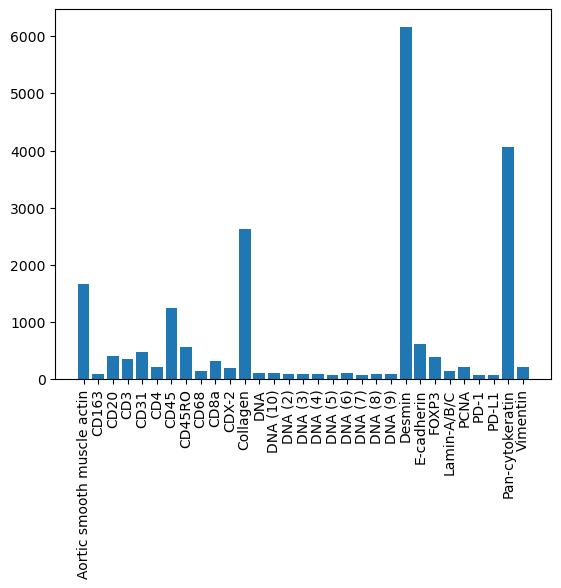

In [75]:
feature_columns = ['DNA', 'DNA (2)', 'DNA (3)', 'CD3', 'CD45RO', 'DNA (4)',
       'Pan-cytokeratin', 'Aortic smooth muscle actin', 'DNA (5)', 'CD4',
       'CD45', 'PD-1', 'DNA (6)', 'CD20', 'CD68', 'CD8a', 'DNA (7)', 'CD163',
       'FOXP3', 'PD-L1', 'DNA (8)', 'E-cadherin', 'Vimentin', 'CDX-2',
       'DNA (9)', 'Lamin-A/B/C', 'Desmin', 'CD31', 'DNA (10)', 'PCNA',
       'Collagen']

sorted_feature_columns = sorted(feature_columns)
cluster_7 = csv_df[csv_df['kmeans'] == 7].index.tolist()
cluster_7_vals = reordered_shap_values[cluster_7].sum(axis=2)
mean_cluster_7_vals = cluster_7_vals.mean(axis=0)
# bar plot of mean_cluster_7_vals, which have labels as feature_columns
plt.bar(sorted_feature_columns, mean_cluster_7_vals)
plt.xticks(rotation=90)
plt.show()


In [ ]:
.shape

(78091, 31)

In [76]:
np.save(f"/Users/swarchol/Research/seal/data/gregg.shap.npy", reordered_shap_values)